In [10]:
## Deutsch-Josza Algorithm

In [11]:
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from numpy.random import randint

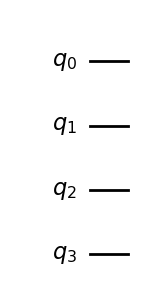

In [12]:
# n is the length of the first input register, the other one is length one
n = 3

const_oracle = QuantumCircuit(n+1)

# randomly choose between a 0 and 1 output

output = randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw('mpl')

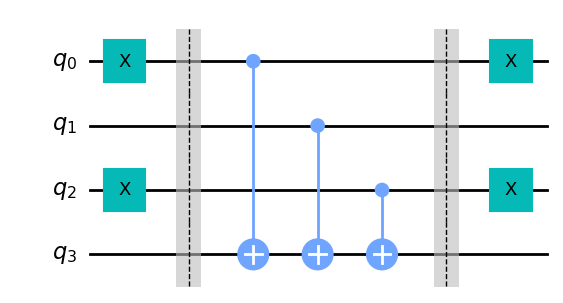

In [13]:
balanced_oracle = QuantumCircuit(n+1)

# b_str determines the particular balanced function

b_str = '101'

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

balanced_oracle.draw('mpl')

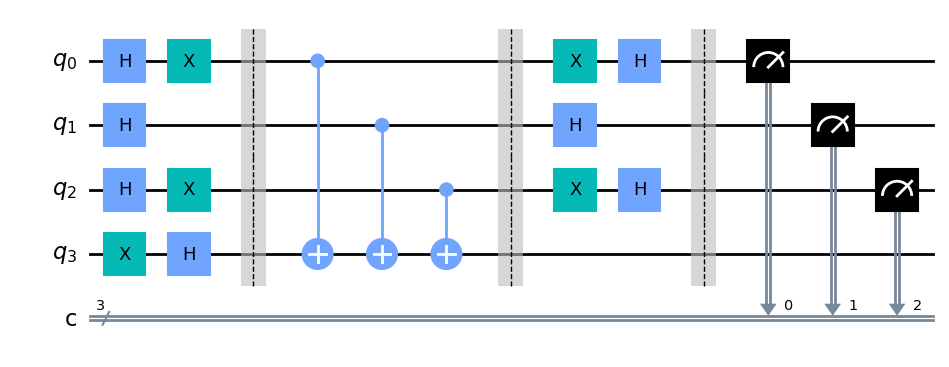

In [14]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state /->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
#dj_circuit += balanced_oracle
dj_circuit.compose(balanced_oracle, inplace=True)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')

{'111': 1024}


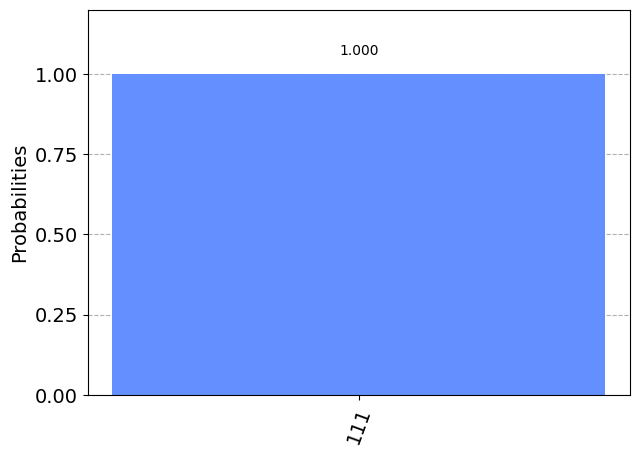

In [15]:
backend = Aer.get_backend('qasm_simulator')
results = execute(dj_circuit, backend).result()
plot_histogram(results.get_counts())

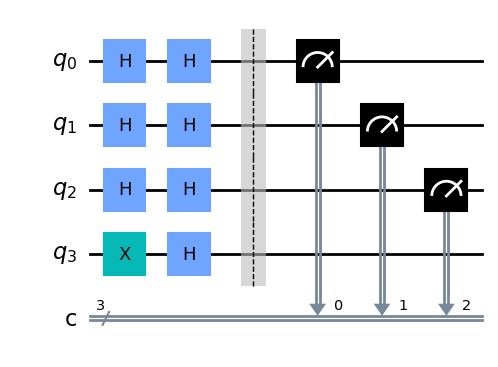

In [16]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state /->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
#dj_circuit += balanced_oracle
dj_circuit.compose(const_oracle, inplace=True)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')

{'000': 1024}


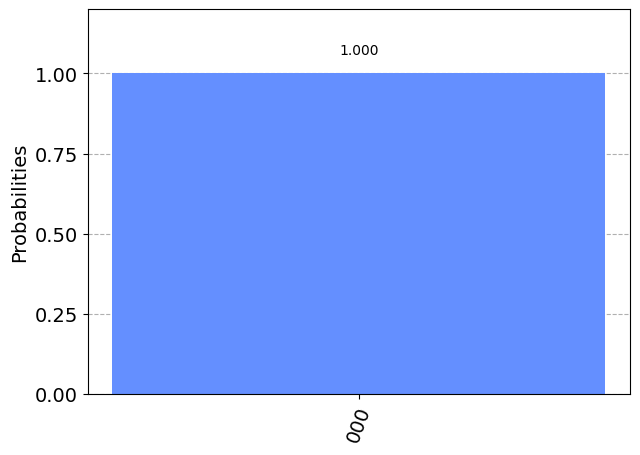

In [17]:
backend = Aer.get_backend('qasm_simulator')
results = execute(dj_circuit, backend).result()
plot_histogram(results.get_counts())